In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cm = "YlOrRd"

In [2]:
def add_column(df, name, series):
    df[name] = series
    return df

In [3]:
import os, glob
csv_files = glob.glob(os.path.join("./data", "*.csv"))
df = pd.concat(add_column(pd.read_csv(path, converters={
    "genre": lambda x: x.replace("short story", "short stories")
}), "year_read", int(os.path.splitext(os.path.basename(path))[0])) for path in csv_files)

In [4]:
df

,author,title,year,genre,country of origin,pages,year_read
0,Curtis Yarvin,Moldbug on Carlyle,2009,politics,USA,115,2021
1,Curtis Yarvin,"Technology, Communism and the Brown Scare",2013,politics,USA,39,2021
2,Curtis Yarvin,Patchwork: A Political System for the 21st Cen...,2008,politics,USA,91,2021
3,Ernst Jünger,Der Waldgang,1951,philosophy,Germany,96,2021
4,H. P. Lovecraft,Collected Short Stories,1937,short stories,USA,800,2021
...,...,...,...,...,...,...,...
58,Jorge Luis Borges,Labyrinthe,1949,short stories,Argentina,169,2020
59,Rolf Schilling,Lingaraja,2012,poetry,Germany,317,2020
60,Rita Reiners,Der Dornbusch,1969,poetry,Germany,68,2020
61,Angelus Silesius,Werde wesentlich!,1657,poetry,Germany,15,2020


In [5]:
df.pivot_table(values="pages", index=["year_read", "genre"], aggfunc=np.sum).unstack().fillna(0).astype(int).transpose().style.background_gradient(axis="rows", cmap=cm)

In [6]:
df.pivot_table(values="pages", index=["author"], aggfunc=np.sum).sort_values(by="pages", ascending=False).head(10)

,pages
author,
Rolf Schilling,3789
Rainer Maria Rilke,1938
Ayn Rand,1703
Walther Kranz,1201
Thorwald Dethlefsen,1188
Stefan Zweig,1043
Friedrich Nietzsche,1006
Jörg Fauser,992
A. C. Bhaktivedanta Prabhupada,989


<AxesSubplot:xlabel='genre'>

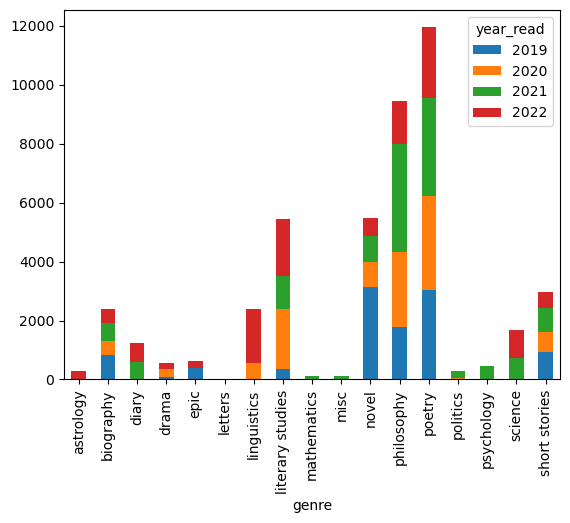

In [7]:
df.groupby(["genre", "year_read"])["pages"].sum().unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='country of origin'>

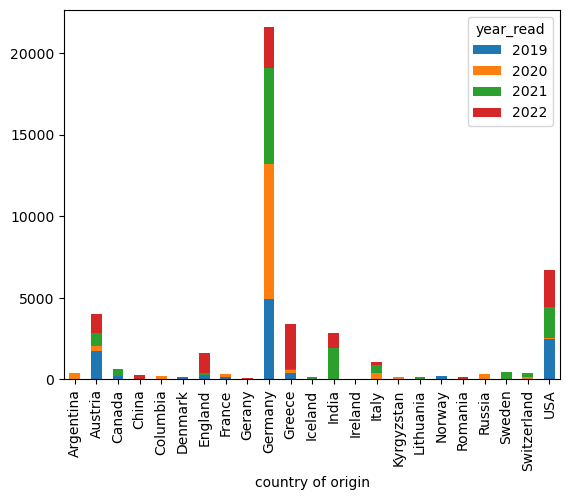

In [8]:
df.groupby(["country of origin", "year_read"])["pages"].sum().unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='year_read'>

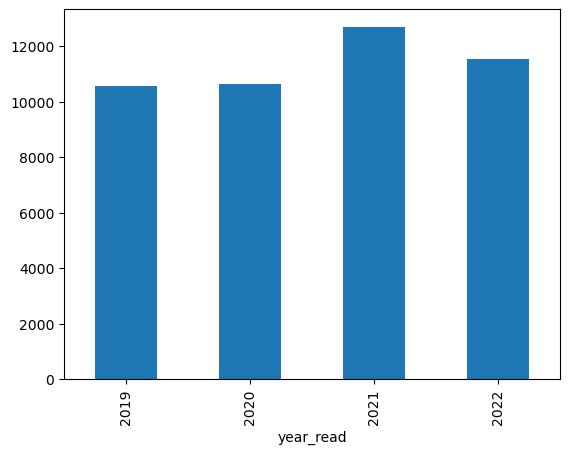

In [9]:
df.groupby("year_read")["pages"].sum().plot.bar(stacked=True)

<AxesSubplot:xlabel='year_read', ylabel='pages'>

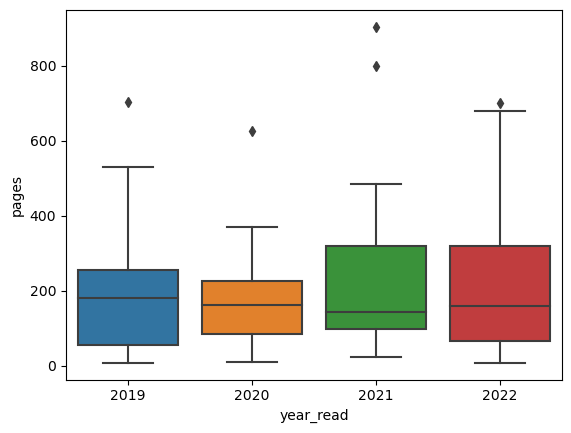

In [10]:
sns.boxplot(data=df, x="year_read", y="pages")

<AxesSubplot:xlabel='year_read', ylabel='year'>

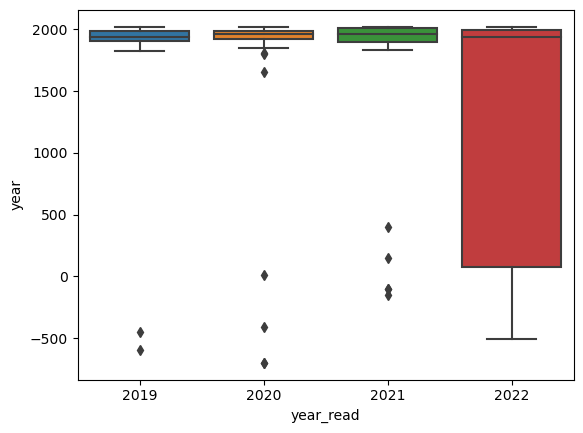

In [11]:
sns.boxplot(data=df, x="year_read", y="year")

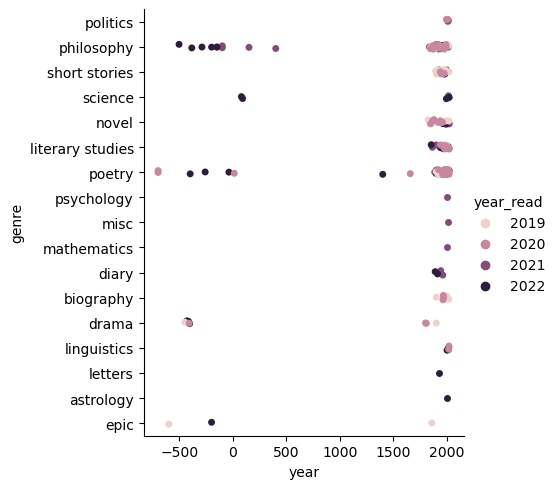

In [12]:
sns.catplot(data=df, x="year", y="genre", hue='year_read')

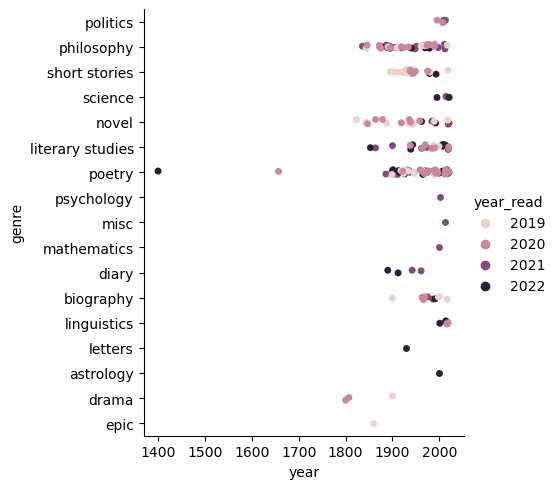

In [13]:
sns.catplot(data=df[df["year"] > 500], x="year", y="genre", hue='year_read')

/nix/store/m80h2d0nrv74a9rcnqkciq3zclq37jrv-python3-3.10.8-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1134: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_data.insert(0, var, comp_col)


ValueError: cannot reindex on an axis with duplicate labels

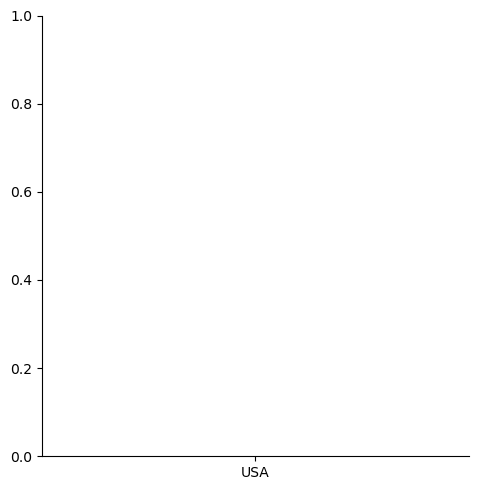

In [14]:
sns.catplot(data=df, x="country of origin", y="year", hue='year_read')

In [ ]:
pd.crosstab(df["country of origin"], df["genre"]).style.background_gradient(axis=None, cmap=cm)

In [ ]:
df.groupby("author").count().sort_values(by="title", ascending=False)